# Data for the C3 Supernova fields
## 2-Point Correlation Function

### The 2-point correlation function, ξ(θ), is a statistical tool used in astronomy to quantify the clustering of galaxies. It measures the excess probability of finding a pair of galaxies separated by an angle θ compared to a random distribution.


In [13]:
import astropy.io.fits as fits
import numpy as np
from scipy.integrate import quad
import scipy.integrate as integrate
from scipy.optimize import curve_fit
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import Table,join
import os
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM
import treecorr
#import arviz as az
#import pandas as pd
#import pymc as pm
%matplotlib inline

import halomod as hm
import hmf


#%matplotlib inline
#plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'],'size':64})
## for Palatino and other serif fonts use:
#plt.rc('font',**{'family':'serif','size':18})
#plt.rc('text', usetex=True)

In [14]:
home_dir = os.path.expanduser('~')
# Construct the path to the "Thesis" directory on the desktop
thesis_path = os.path.join(home_dir, 'Master_Thesis', 'DATA')


fits_file_path = os.path.join(thesis_path, "table")  


t= Table.read(fits_file_path)

#t= t[::5]  # Making sample smaller so my computer can handle it

t

id_1,ra,dec,fof_id,fof_size,mask_flags,flags,flagstr,badpix_frac,psf_g_0,psf_g_1,psf_T,bdf_T,bdf_T_err,bdf_T_ratio,bdf_g_0,bdf_g_1,bdf_fracdev,bdf_fracdev_err,tilename,EBV_SFD98,mask_flags_nir,flags_nir,flagstr_nir,badpix_frac_nir,psf_flux_u,psf_flux_g,psf_flux_r,psf_flux_i,psf_flux_z,psf_flux_J,psf_flux_H,psf_flux_Ks,psf_flux_err_u,psf_flux_err_g,psf_flux_err_r,psf_flux_err_i,psf_flux_err_z,psf_flux_err_J,psf_flux_err_H,psf_flux_err_Ks,bdf_flux_u,bdf_flux_g,bdf_flux_r,bdf_flux_i,bdf_flux_z,bdf_flux_J,bdf_flux_H,bdf_flux_Ks,bdf_flux_err_u,bdf_flux_err_g,bdf_flux_err_r,bdf_flux_err_i,bdf_flux_err_z,bdf_flux_err_J,bdf_flux_err_H,bdf_flux_err_Ks,gap_flux_u,gap_flux_g,gap_flux_r,gap_flux_i,gap_flux_z,gap_flux_J,gap_flux_H,gap_flux_Ks,gap_flux_err_u,gap_flux_err_g,gap_flux_err_r,gap_flux_err_i,gap_flux_err_z,gap_flux_err_J,gap_flux_err_H,gap_flux_err_Ks,psf_flux_calib_u,psf_flux_calib_g,psf_flux_calib_r,psf_flux_calib_i,psf_flux_calib_z,psf_flux_calib_J,psf_flux_calib_H,psf_flux_calib_Ks,psf_flux_err_calib_u,psf_flux_err_calib_g,psf_flux_err_calib_r,psf_flux_err_calib_i,psf_flux_err_calib_z,psf_flux_err_calib_J,psf_flux_err_calib_H,psf_flux_err_calib_Ks,bdf_flux_calib_u,bdf_flux_calib_g,bdf_flux_calib_r,bdf_flux_calib_i,bdf_flux_calib_z,bdf_flux_calib_J,bdf_flux_calib_H,bdf_flux_calib_Ks,bdf_flux_err_calib_u,bdf_flux_err_calib_g,bdf_flux_err_calib_r,bdf_flux_err_calib_i,bdf_flux_err_calib_z,bdf_flux_err_calib_J,bdf_flux_err_calib_H,bdf_flux_err_calib_Ks,psf_flux_dered_u,psf_flux_dered_g,psf_flux_dered_r,psf_flux_dered_i,psf_flux_dered_z,psf_flux_dered_J,psf_flux_dered_H,psf_flux_dered_Ks,psf_flux_err_dered_u,psf_flux_err_dered_g,psf_flux_err_dered_r,psf_flux_err_dered_i,psf_flux_err_dered_z,psf_flux_err_dered_J,psf_flux_err_dered_H,psf_flux_err_dered_Ks,bdf_flux_dered_u,bdf_flux_dered_g,bdf_flux_dered_r,bdf_flux_dered_i,bdf_flux_dered_z,bdf_flux_dered_J,bdf_flux_dered_H,bdf_flux_dered_Ks,bdf_flux_err_dered_u,bdf_flux_err_dered_g,bdf_flux_err_dered_r,bdf_flux_err_dered_i,bdf_flux_err_dered_z,bdf_flux_err_dered_J,bdf_flux_err_dered_H,bdf_flux_err_dered_Ks,psf_flux_dered_calib_u,psf_flux_dered_calib_g,psf_flux_dered_calib_r,psf_flux_dered_calib_i,psf_flux_dered_calib_z,psf_flux_dered_calib_J,psf_flux_dered_calib_H,psf_flux_dered_calib_Ks,psf_flux_err_dered_calib_u,psf_flux_err_dered_calib_g,psf_flux_err_dered_calib_r,psf_flux_err_dered_calib_i,psf_flux_err_dered_calib_z,psf_flux_err_dered_calib_J,psf_flux_err_dered_calib_H,psf_flux_err_dered_calib_Ks,bdf_flux_dered_calib_u,bdf_flux_dered_calib_g,bdf_flux_dered_calib_r,bdf_flux_dered_calib_i,bdf_flux_dered_calib_z,bdf_flux_dered_calib_J,bdf_flux_dered_calib_H,bdf_flux_dered_calib_Ks,bdf_flux_err_dered_calib_u,bdf_flux_err_dered_calib_g,bdf_flux_err_dered_calib_r,bdf_flux_err_dered_calib_i,bdf_flux_err_dered_calib_z,bdf_flux_err_dered_calib_J,bdf_flux_err_dered_calib_H,bdf_flux_err_dered_calib_Ks,psf_mag_u,psf_mag_g,psf_mag_r,psf_mag_i,psf_mag_z,psf_mag_J,psf_mag_H,psf_mag_Ks,psf_mag_dered_u,psf_mag_dered_g,psf_mag_dered_r,psf_mag_dered_i,psf_mag_dered_z,psf_mag_dered_J,psf_mag_dered_H,psf_mag_dered_Ks,psf_mag_err_dered_u,psf_mag_err_dered_g,psf_mag_err_dered_r,psf_mag_err_dered_i,psf_mag_err_dered_z,psf_mag_err_dered_J,psf_mag_err_dered_H,psf_mag_err_dered_Ks,psf_mag_dered_calib_u,psf_mag_dered_calib_g,psf_mag_dered_calib_r,psf_mag_dered_calib_i,psf_mag_dered_calib_z,psf_mag_dered_calib_J,psf_mag_dered_calib_H,psf_mag_dered_calib_Ks,bdf_mag_u,bdf_mag_g,bdf_mag_r,bdf_mag_i,bdf_mag_z,bdf_mag_J,bdf_mag_H,bdf_mag_Ks,bdf_mag_dered_u,bdf_mag_dered_g,bdf_mag_dered_r,bdf_mag_dered_i,bdf_mag_dered_z,bdf_mag_dered_J,bdf_mag_dered_H,bdf_mag_dered_Ks,bdf_mag_err_dered_u,bdf_mag_err_dered_g,bdf_mag_err_dered_r,bdf_mag_err_dered_i,bdf_mag_err_dered_z,bdf_mag_err_dered_J,bdf_mag_err_dered_H,bdf_mag_err_dered_Ks,bdf_mag_dered_calib_u,bdf_mag_dered_calib_g,bdf_mag_dered_calib_r,bdf_mag_dered_calib_i,bdf_mag_dered_calib_z,bdf_mag_dered_calib_J,bdf_mag_dered_calib_H,bdf_mag_dered_calib_Ks,kNN_class,z,SM,

In [15]:
"""home_dir = os.path.expanduser('~')

# Construct the path to the "Thesis" directory on the desktop
thesis_path = os.path.join(home_dir, 'Desktop', 'Thesis')


fits_file_path = os.path.join(thesis_path, "Y3_deep_fields_DB_wKNN_cat_SN-C3_zm.fits")  
t= Table.read(fits_file_path)


masked = os.path.join(thesis_path, "SN-C3_masked_cat.fits") 
t3= Table.read(masked)

t=join(t,t3,keys='id')
t.rename_column('ra_1','ra')
t.rename_column('dec_1','dec')
"""

fits_random = os.path.join(thesis_path, "SN-C3_randoms_ugriz_trim_video.fits") 

hdulist = fits.open(fits_random)
hdulist.info()

t2= Table.read(fits_random)


Filename: /home/astro/manasoi7/Master_Thesis/DATA/SN-C3_randoms_ugriz_trim_video.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  SN-C3_C01_randoms_raw.fits    1 BinTableHDU     18   13402307R x 3C   [E, E, 9A]   


In [16]:
config = {
    'min_sep':  0.003,
    'max_sep': 1.78,
    'bin_size': 0.1,
    'sep_units': 'degrees',
    'var_method': 'bootstrap'  # or 'jackknife'
}

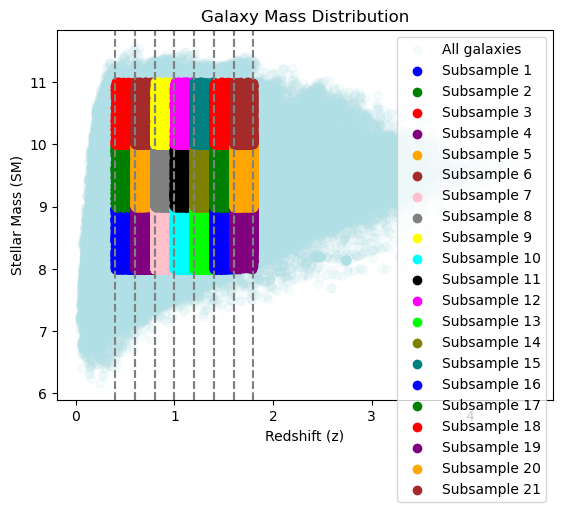

Subsample 1: N = 8932
  z_mean: 0.5
  SM_mean: 8.5
  z_min: 0.4

Subsample 2: N = 5529
  z_mean: 0.5
  SM_mean: 9.5
  z_min: 0.4

Subsample 3: N = 2997
  z_mean: 0.5
  SM_mean: 10.5
  z_min: 0.4

Subsample 4: N = 21005
  z_mean: 0.7
  SM_mean: 8.5
  z_min: 0.6

Subsample 5: N = 8920
  z_mean: 0.7
  SM_mean: 9.5
  z_min: 0.6

Subsample 6: N = 4983
  z_mean: 0.7
  SM_mean: 10.5
  z_min: 0.6

Subsample 7: N = 33648
  z_mean: 0.9
  SM_mean: 8.5
  z_min: 0.8

Subsample 8: N = 12992
  z_mean: 0.9
  SM_mean: 9.5
  z_min: 0.8

Subsample 9: N = 6157
  z_mean: 0.9
  SM_mean: 10.5
  z_min: 0.8

Subsample 10: N = 23097
  z_mean: 1.1
  SM_mean: 8.5
  z_min: 1.0

Subsample 11: N = 12776
  z_mean: 1.1
  SM_mean: 9.5
  z_min: 1.0

Subsample 12: N = 5529
  z_mean: 1.1
  SM_mean: 10.5
  z_min: 1.0

Subsample 13: N = 18395
  z_mean: 1.2999999999999998
  SM_mean: 8.5
  z_min: 1.2

Subsample 14: N = 13427
  z_mean: 1.2999999999999998
  SM_mean: 9.5
  z_min: 1.2

Subsample 15: N = 5136
  z_mean: 1.299999999

In [17]:
class Subsample:
    def __init__(self, z_min, z_max, SM_min, SM_max):
        self.z_min = z_min
        self.z_max = z_max
        self.SM_min = SM_min
        self.SM_max = SM_max
        self.info = {}  # Empty dictionary to store information

        # Add relevant information for R_0 calculation (e.g., delta, A, delta_z)
        self.info['delta'] = None  # Placeholder for delta
        self.info['A'] = None  # Placeholder for A
        # self.info['A'] = np.zeros()
        self.info['delta_z'] = (z_max - z_min)  # Assuming delta_z is the redshift bin width
        
       

    def apply(self, data):
        """
        Selects data points within the subsample region.

        Args:
            data: A dictionary containing data columns like 'z' and 'SM'.

        Returns:
            A boolean mask for the subsample selection.
        """
        return (data['z'] > self.z_min) & (data['z'] <= self.z_max) & \
               (data['SM'] > self.SM_min) & (data['SM'] <= self.SM_max)
    
    
    
# Define z and SM ranges
z_values = np.array([ 0.4,0.6,0.8, 1.0, 1.2, 1.4,1.6,1.8])

#SM_range = np.linspace(9.5, 11, num=2) # High SM
#SM_range = np.linspace(8, 9.5, num=2) #Low SM

SM_range = np.linspace(8, 11, num=4) 



# Create subsamples
subsamples = []
z_mean_range = []
SM_mean_range = []

for i in range(len(z_values) - 1):
    z_min = z_values[i]
    z_max = z_values[i + 1]
    z_mean = (z_min + z_max) / 2
    z_mean_range.append(z_mean)

    for j in range(len(SM_range) - 1):
        SM_min = SM_range[j]
        SM_max = SM_range[j + 1]
        SM_mean = (SM_min + SM_max) / 2
        SM_mean_range.append(SM_mean)

        subsample = Subsample(z_min, z_max, SM_min, SM_max)
        subsample.info['z_mean'] = z_mean  # Add z_mean to the info dictionary
        subsample.info['z_min'] = z_min 
        subsample.info['SM_mean'] = SM_mean  # Add SM_mean to the info dictionary
        subsample.info['delta_z'] = (z_max - z_min)  # Assuming delta_z is the redshift bin width
        subsamples.append(subsample)


        
        
plt.scatter(t['z'], t['SM'], label='All galaxies',color='powderblue',alpha=0.1)

# Scatter plot with subsample colors
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'yellow', 'cyan', 'black', 'magenta', 'lime', 'olive', 'teal']
num_colors = len(colors)


for i, subsample in enumerate(subsamples):
    subset = subsample.apply(t)
    z_subsample = t['z'][subset]
    SM_subsample = t['SM'][subset]

    plt.scatter(z_subsample, SM_subsample, label=f'Subsample {i+1}', c=colors[i % num_colors])

for i in range(len(z_values) - 1):
    z_min = z_values[i]
    z_max = z_values[i + 1]
    plt.axvline(z_min, linestyle='--', color='gray')
    plt.axvline(z_max, linestyle='--', color='gray')

plt.xlabel('Redshift (z)')
plt.ylabel('Stellar Mass (SM)')
plt.title('Galaxy Mass Distribution')
plt.legend()
plt.show()

# Create SkyCoord catalogs for subsamples
catalogs = []

for subsample in subsamples:
    subset = subsample.apply(t)
    catalog = t[subset]
    #catalog = SkyCoord(ra=ra_subset * u.deg, dec=dec_subset * u.deg)
    
    catalogs.append(catalog)

# Print number of galaxies in each subsample
for i, subsample in enumerate(subsamples):
    N = len(catalogs[i])

    print(f"Subsample {i+1}: N = {N}")
    print(f"  z_mean: {subsample.info['z_mean']}")
    print(f"  SM_mean: {subsample.info['SM_mean']}")
    print(f"  z_min: {subsample.info['z_min']}")
    print()
    

In [18]:
print(len(subsamples))

21


In [19]:

class CorrelationFunction:
    def __init__(self, cat, randoms, config, rr=None):
        self.cat = cat
        self.randoms = randoms
        self.config = config

        # Create TreeCorr catalogs
        self.data = treecorr.Catalog(ra=cat['ra'], dec=cat['dec'], 
                                     ra_units='degrees', dec_units='degrees', npatch=50)
        self.rand = treecorr.Catalog(ra=randoms['ra'], dec=randoms['dec'], 
                                     ra_units='degrees', dec_units='degrees', npatch=50)

        # Create TreeCorr correlation functions
        self.dd = treecorr.NNCorrelation(**config)
        self.rr = treecorr.NNCorrelation(**config)
        self.dr = treecorr.NNCorrelation(**config)
        
    #def process_rand(self):
        #self.rr.process(self.rand) ###????maybe here problem?

    def process(self):
        self.dd.process(self.data)
        self.dr.process(self.data, self.rand)
        self.rr.process(self.rand)

    def calculate_w_theta(self):
        theta = np.exp(self.dd.meanlogr)
        w, varw = self.dd.calculateXi(rr=self.rr, dr=self.dr) 
        
        return w, varw, theta , self.rr
    

    """def power_law(self,theta, A, delta):
        self.A=A
        self.theta=theta
        self.delta= delta
        
        return A * theta**delta"""

In [20]:
randoms = t2
#randoms = t2[::1000]

In [21]:
"""c1 = CorrelationFunction(catalog, randoms, config)
c1.process()
w, varw, theta, rr = c1.calculate_w_theta()
f1= c1.power_law(theta,0.02,-0.8)"""



'c1 = CorrelationFunction(catalog, randoms, config)\nc1.process()\nw, varw, theta, rr = c1.calculate_w_theta()\nf1= c1.power_law(theta,0.02,-0.8)'

In [22]:
"""plt.plot(theta, f1, label='Power Law Fit')
plt.xlabel(r'$\theta$ (degrees)')
plt.ylabel(r'$w(\theta)$')
plt.title("Power Law Fit for 2PCF")
plt.yscale('log')
plt.xscale('log')
       
plt.show()"""

'plt.plot(theta, f1, label=\'Power Law Fit\')\nplt.xlabel(r\'$\theta$ (degrees)\')\nplt.ylabel(r\'$w(\theta)$\')\nplt.title("Power Law Fit for 2PCF")\nplt.yscale(\'log\')\nplt.xscale(\'log\')\n       \nplt.show()'

In [23]:
"""subsample = (t['z'] > 0.5) & (t['z'] <= 0.6) & (t['SM'] > 10) & (t['SM'] <= 10.5)
subset = t[subsample]
randoms = t2[::1000]

corr_func = CorrelationFunction(subset, randoms, config)


corr_func.process_rand() #crashes here
corr_func.process() # and crashes here too
w, varw, theta, rr = corr_func.calculate_w_theta()


# Save the data to a text file, separating columns with commas
np.savetxt("w.txt", w, delimiter=",")
np.savetxt("varw.txt", w, delimiter=",")
np.savetxt("theta.txt", w, delimiter=",")
np.savetxt("rr.txt", w, delimiter=",")
"""

'subsample = (t[\'z\'] > 0.5) & (t[\'z\'] <= 0.6) & (t[\'SM\'] > 10) & (t[\'SM\'] <= 10.5)\nsubset = t[subsample]\nrandoms = t2[::1000]\n\ncorr_func = CorrelationFunction(subset, randoms, config)\n\n\ncorr_func.process_rand() #crashes here\ncorr_func.process() # and crashes here too\nw, varw, theta, rr = corr_func.calculate_w_theta()\n\n\n# Save the data to a text file, separating columns with commas\nnp.savetxt("w.txt", w, delimiter=",")\nnp.savetxt("varw.txt", w, delimiter=",")\nnp.savetxt("theta.txt", w, delimiter=",")\nnp.savetxt("rr.txt", w, delimiter=",")\n'

In [24]:
# Create CorrelationFunction objects with the same configuration
corr_funcs = []

for i, catalog in enumerate(catalogs):


    corr_func = CorrelationFunction(catalog, randoms, config)
    corr_func.process()
    w, varw, theta, rr = corr_func.calculate_w_theta()

    # Append the calculated values to the corresponding subsample's info dictionary
    subsamples[i].info['w'] = w
    subsamples[i].info['varw'] = varw
    subsamples[i].info['theta'] = theta
    subsamples[i].info['rr'] = rr
    corr_funcs.append(corr_func)
  
"""  
for i, subsample in enumerate(subsamples):
    N = len(catalogs[i])
    print(f"Subsample {i+1}: N = {N}")
    print(f"  w: {subsample.info['w']}")
    print(f"  theta: {subsample.info['theta']}")
"""

'  \nfor i, subsample in enumerate(subsamples):\n    N = len(catalogs[i])\n    print(f"Subsample {i+1}: N = {N}")\n    print(f"  w: {subsample.info[\'w\']}")\n    print(f"  theta: {subsample.info[\'theta\']}")\n'

In [25]:
ws= []
varws= []
thetas= []
results= []
# Process and calculate w(theta) for each subsample
for i, corr_func in enumerate(corr_funcs):
    w, varw, theta, rr = corr_func.calculate_w_theta()
    ws.append(w)
    varws.append(varw)
    thetas.append(theta)
    
    # Create a dictionary for this iteration
    iteration_results = {
            "w": w,
            "varw": varw,
            "theta": theta}

        # Append the iteration results to the main list
    results.append(iteration_results)


In [26]:
print(len(thetas))

21


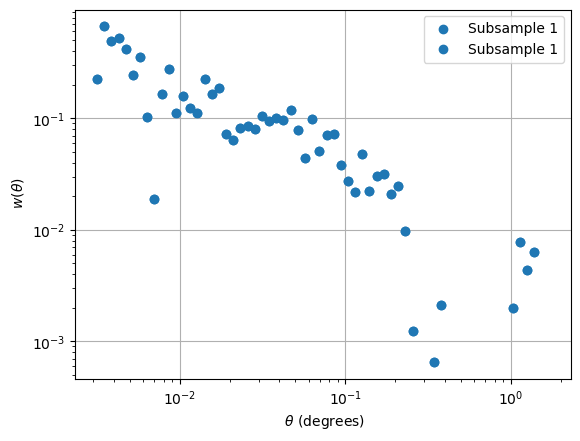

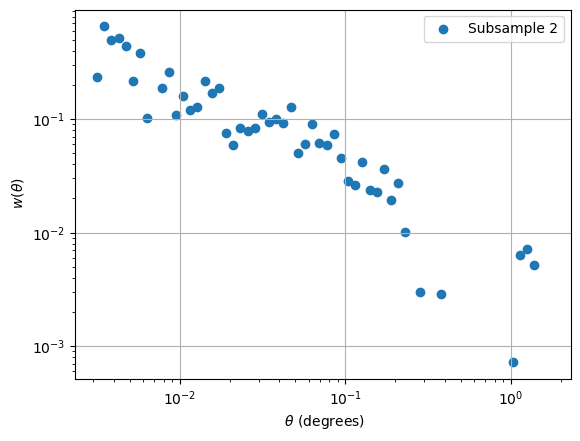

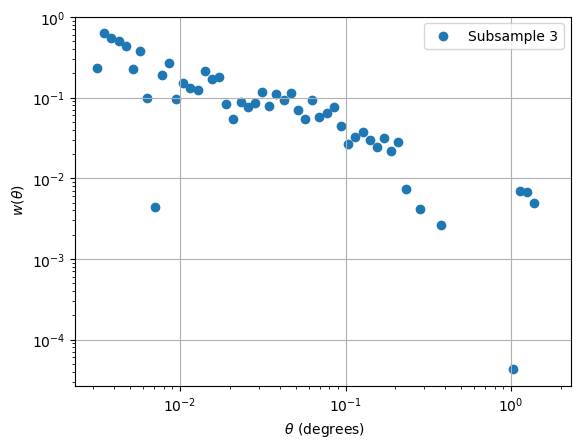

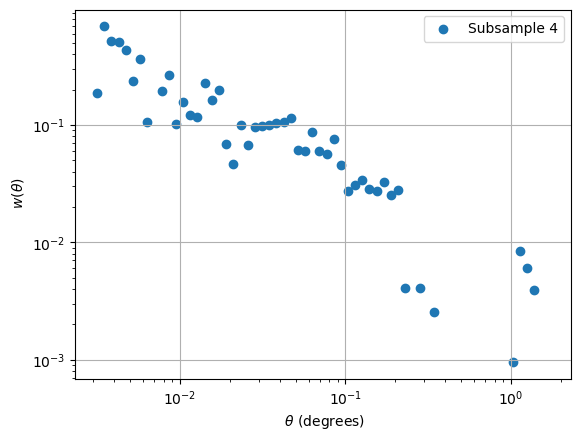

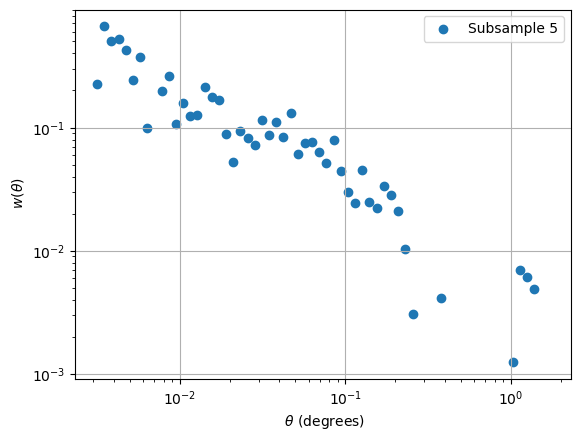

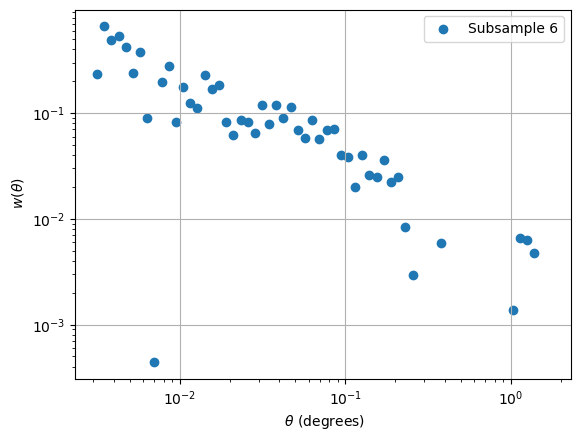

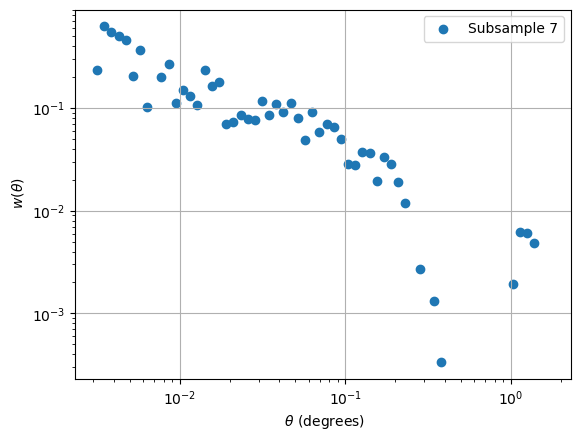

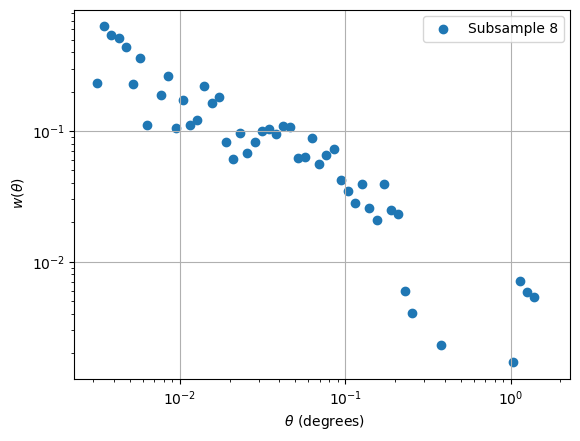

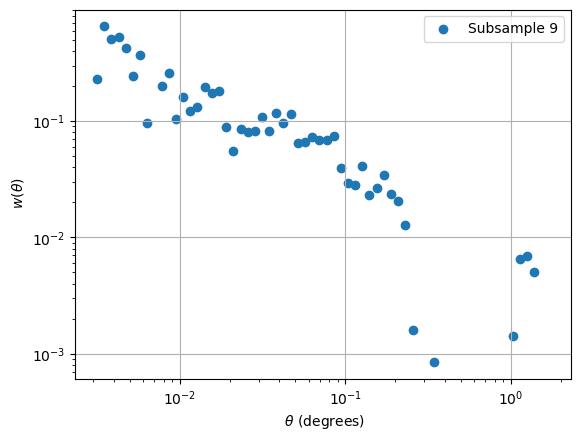

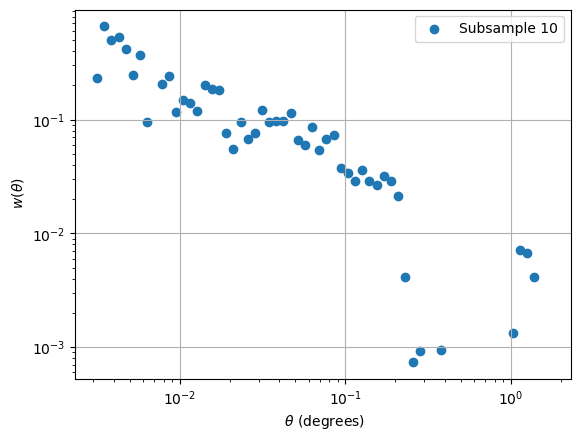

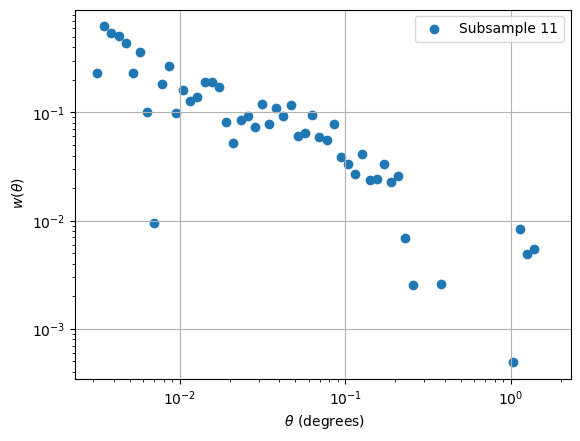

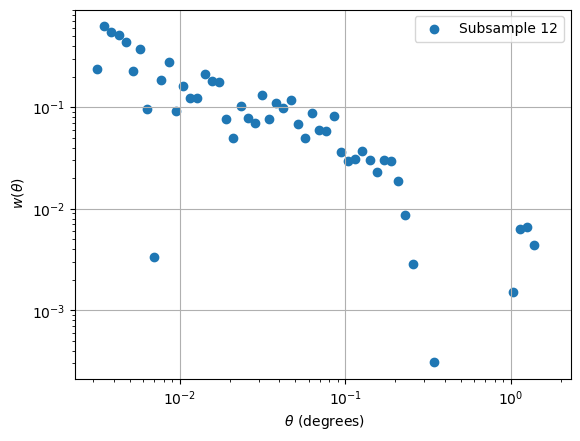

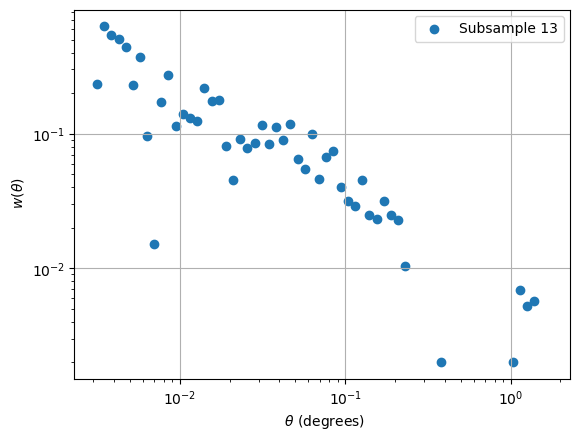

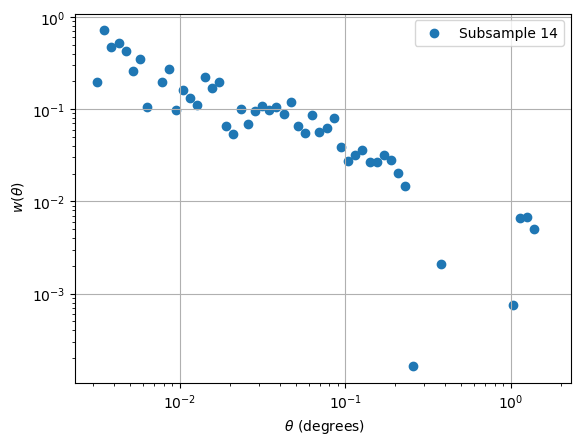

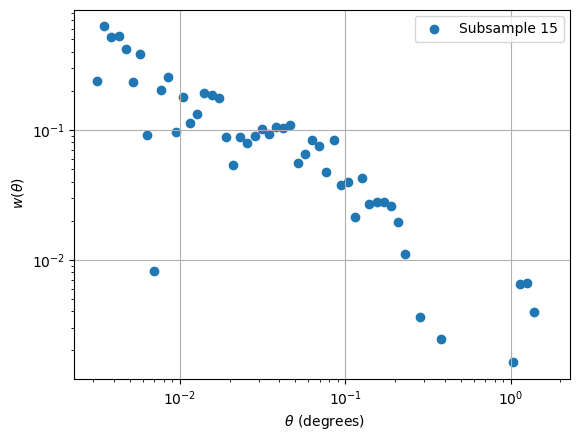

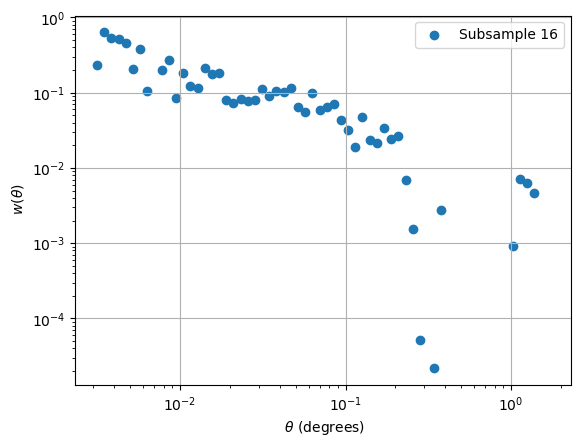

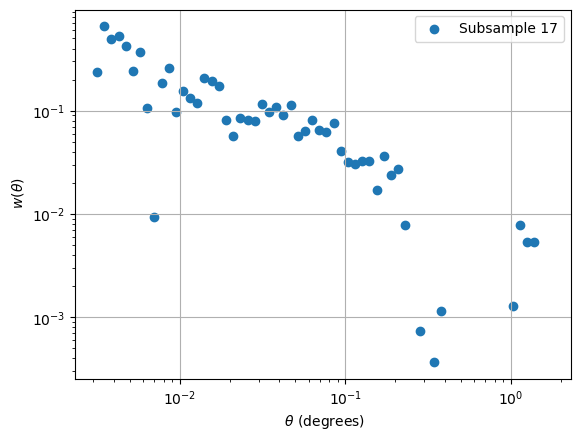

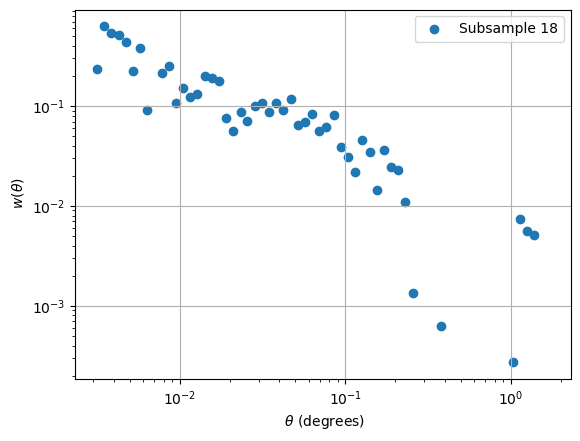

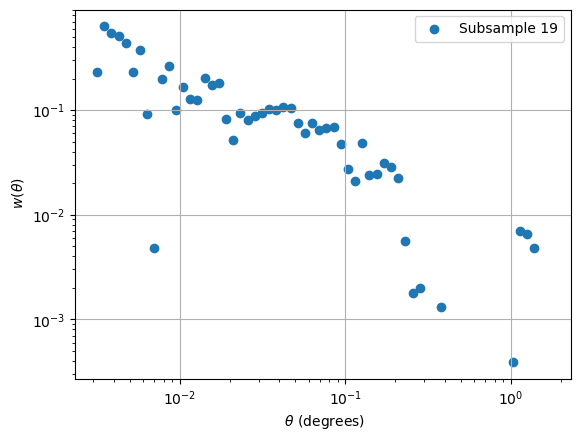

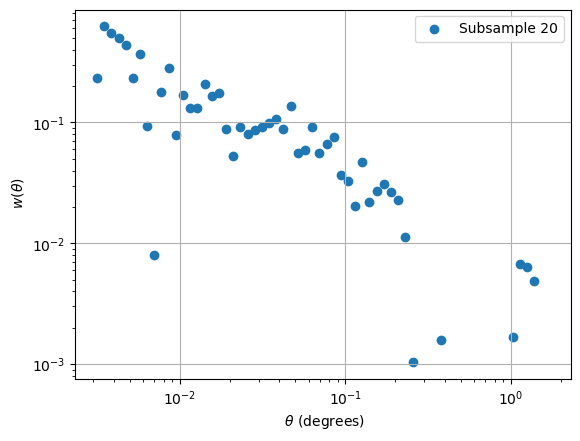

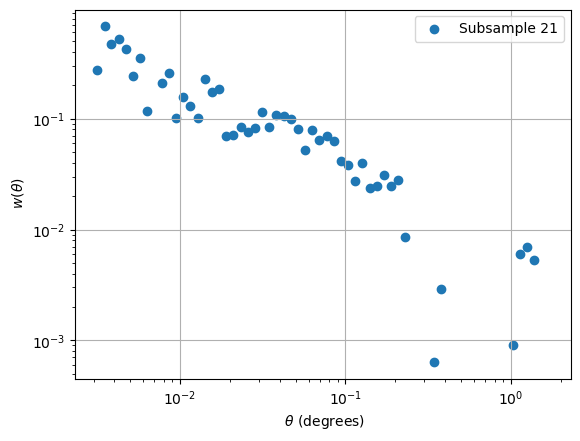

In [121]:
for i, subsample in enumerate(subsamples):
    plt.scatter( subsample.info['theta'], subsample.info['w'], label=f"Subsample {i+1}")
    plt.xlabel(r' $ \theta$ (degrees)')  #correlation function w
    plt.ylabel(r' $w(\theta)$') # angular separation theta
    plt.legend()
    plt.yscale('log')
    plt.xscale('log')
    plt.grid(True)

    plt.show()

In [122]:
"""
# Assuming subsamples is a list of dictionaries containing 'w' and 'theta' keys
for i, subsample in enumerate(subsamples):
  
    plt.scatter( thetas[i], ws[i], label=f"Subsample {i+1}")
    plt.xlabel(r' $ \theta$ (degrees)')  #correlation function w
    plt.ylabel(r' $w(\theta)$') # angular separation theta
    plt.legend()
    plt.yscale('log')
    plt.xscale('log')
    plt.grid(True)

    plt.show()
    """


'\n# Assuming subsamples is a list of dictionaries containing \'w\' and \'theta\' keys\nfor i, subsample in enumerate(subsamples):\n  \n    plt.scatter( thetas[i], ws[i], label=f"Subsample {i+1}")\n    plt.xlabel(r\' $ \theta$ (degrees)\')  #correlation function w\n    plt.ylabel(r\' $w(\theta)$\') # angular separation theta\n    plt.legend()\n    plt.yscale(\'log\')\n    plt.xscale(\'log\')\n    plt.grid(True)\n\n    plt.show()\n    '

In [123]:
"""fit= corr_func.power_law(theta, A=0.01)
err=np.sqrt(varw)"""

'fit= corr_func.power_law(theta, A=0.01)\nerr=np.sqrt(varw)'

In [124]:
"""

def power_law(theta, A, delta):
    return A * theta**delta


def fit_and_plot_power_law(theta, w, cat):
   

    # Fit the power law using curve_fit with initial guesses
    popt, pcov = curve_fit(power_law, theta, w, p0=[2e-2, -0.8])

    # Extract fitted parameters
    A_fit = popt[0]
    delta_fit = popt[1]

    # Calculate amplitude at 1 degree
    amplitude_at_1deg = power_law(1, A_fit, delta_fit)

    # Print fit parameters
    print(f"Subsample {cat}, Power-law Fit Parameters")
    print(f" Amplitude at 1°:", amplitude_at_1deg)
    print()

    return amplitude_at_1deg


    
As = []
for i, catalog in enumerate(catalogs):
    A = fit_and_plot_power_law(thetas[i],ws[i], i + 1)
    
    plt.scatter(thetas[i],ws[i], label=f"Subsample {catalog}")
    plt.plot(thetas[i], power_law(thetas[i], *popt), label='Power Law Fit')
    plt.xlabel(r' $ \theta$ (degrees)')
    plt.ylabel(r' $w(\theta)$')
    plt.yscale('log')
    plt.xscale('log')
    plt.grid(True)
    plt.show()
    
    subsample.info['Amplitude'] = fit_and_plot_power_law(theta, w, catalog)
    subsamples.append(subsample)
    
    As.append(A)
"""

'\n\ndef power_law(theta, A, delta):\n    return A * theta**delta\n\n\ndef fit_and_plot_power_law(theta, w, cat):\n   \n\n    # Fit the power law using curve_fit with initial guesses\n    popt, pcov = curve_fit(power_law, theta, w, p0=[2e-2, -0.8])\n\n    # Extract fitted parameters\n    A_fit = popt[0]\n    delta_fit = popt[1]\n\n    # Calculate amplitude at 1 degree\n    amplitude_at_1deg = power_law(1, A_fit, delta_fit)\n\n    # Print fit parameters\n    print(f"Subsample {cat}, Power-law Fit Parameters")\n    print(f" Amplitude at 1°:", amplitude_at_1deg)\n    print()\n\n    return amplitude_at_1deg\n\n\n    \nAs = []\nfor i, catalog in enumerate(catalogs):\n    A = fit_and_plot_power_law(thetas[i],ws[i], i + 1)\n    \n    plt.scatter(thetas[i],ws[i], label=f"Subsample {catalog}")\n    plt.plot(thetas[i], power_law(thetas[i], *popt), label=\'Power Law Fit\')\n    plt.xlabel(r\' $ \theta$ (degrees)\')\n    plt.ylabel(r\' $w(\theta)$\')\n    plt.yscale(\'log\')\n    plt.xscale(\'log\

In [125]:
print(subsample.info['A'])

0.003961299193451377


Subsample 1, Power-law Fit Parameters
 Amplitude at 1°: 0.0044038332846912534
 Delta: -0.8127641673874175

Subsample 2, Power-law Fit Parameters
 Amplitude at 1°: 0.0044021561818881295
 Delta: -0.8131823806676912

Subsample 3, Power-law Fit Parameters
 Amplitude at 1°: 0.004433568303120277
 Delta: -0.8119259468991735

Subsample 4, Power-law Fit Parameters
 Amplitude at 1°: 0.004569339469527793
 Delta: -0.8056076980473255

Subsample 5, Power-law Fit Parameters
 Amplitude at 1°: 0.00440436413415383
 Delta: -0.8128844111859694

Subsample 6, Power-law Fit Parameters
 Amplitude at 1°: 0.004379958264788177
 Delta: -0.814149120581888

Subsample 7, Power-law Fit Parameters
 Amplitude at 1°: 0.004411104686847357
 Delta: -0.8129091591929076

Subsample 8, Power-law Fit Parameters
 Amplitude at 1°: 0.004400960357537567
 Delta: -0.8133100317342992

Subsample 9, Power-law Fit Parameters
 Amplitude at 1°: 0.004422466489363441
 Delta: -0.811995982963625

Subsample 10, Power-law Fit Parameters
 Amplitu

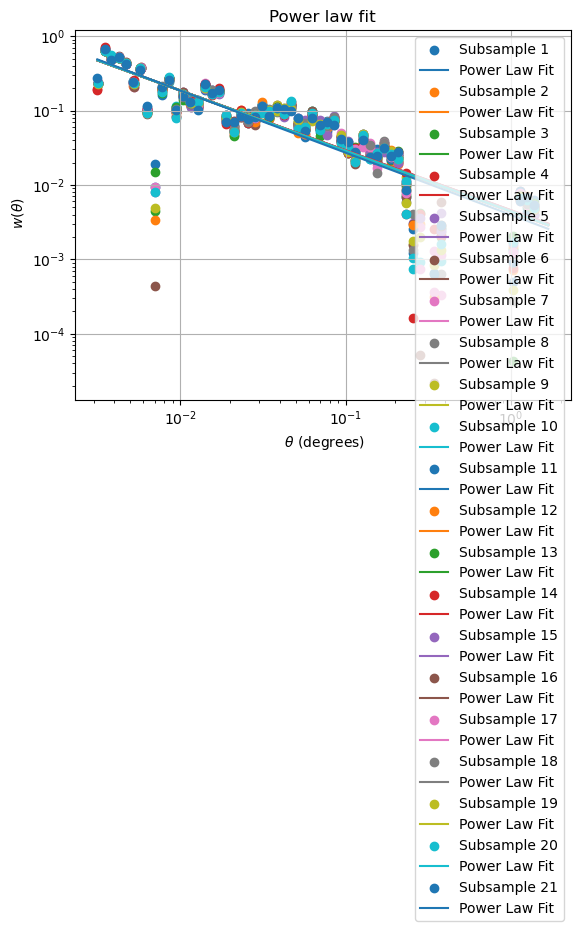

In [126]:
def power_law(theta, A, delta):
    return A * theta**delta


def fit_and_plot_power_law(theta, w, cat):
    """
    Fits a power law to the provided 2PCF data and plots the results.

    Args:
        theta (np.ndarray): Angular separation bins.
        w (np.ndarray): 2PCF values for the current catalog.
        cat (int): Identifier for the current catalog (used for labeling).
    """

    # Fit the power law using curve_fit with initial guesses
    #popt, pcov = curve_fit(power_law, theta, w, p0=[2e-2, -0.8])
    popt, pcov = curve_fit(power_law, subsample.info['theta'], subsample.info['w'], p0=[2e-2, -0.8])

    # Extract fitted parameters
    A_fit = popt[0]
    delta_fit = popt[1]

    # Calculate amplitude at 1 degree
    amplitude_at_1deg = power_law(1, A_fit, delta_fit)

    # Print fit parameters
    print(f"Subsample {cat}, Power-law Fit Parameters")
    print(f" Amplitude at 1°:", amplitude_at_1deg)
    print(f" Delta:", delta_fit)
    print()

    # Plot the data and fitted curve for this catalog
    #plt.scatter(theta, w, label=f"Subsample {cat}")
    #plt.plot(theta, power_law(theta, *popt), label='Power Law Fit')
    
    plt.scatter(subsample.info['theta'], subsample.info['w'], label=f"Subsample {cat}")
    plt.plot(subsample.info['theta'], power_law(subsample.info['theta'], *popt), label='Power Law Fit')


    return amplitude_at_1deg, delta_fit

"""
As = []
for i, catalog in enumerate(catalogs):
    # Call fit_and_plot_power_law to get fit parameters and plot for each catalog
    A = fit_and_plot_power_law(thetas[i], ws[i], i + 1)
    
    As.append(A)"""
    
deltas = []
As = []
for i, subsample in enumerate(subsamples):
    #A, delta = fit_and_plot_power_law(thetas[i], ws[i], i + 1)
    #     subsamples[i].info['w']
    A, delta = fit_and_plot_power_law(subsamples[i].info['theta'][i], subsamples[i].info['w'], i + 1)
    subsamples[i].info['A'] = A
    subsamples[i].info['delta'] = delta
    

    As.append(A)
    deltas.append(delta)
    
    
    

# Additional plotting customizations (labels, grid, etc.) can be added here
plt.title("Power law fit")
plt.xlabel(r' $ \theta$ (degrees)')
plt.ylabel(r' $w(\theta)$')
plt.yscale('log')
plt.xscale('log')
plt.savefig("Power law fit")

plt.grid(True)
plt.legend()
plt.show()


In [33]:
#print(As)

In [34]:
"""for subsample in subsamples:
    subsample.A = np.array(As)  # Convert As to a numpy array
    subsample.delta = np.array(deltas)  # Convert deltas to a numpy array"""


'for subsample in subsamples:\n    subsample.A = np.array(As)  # Convert As to a numpy array\n    subsample.delta = np.array(deltas)  # Convert deltas to a numpy array'

In [35]:
"""for subsample in subsamples:
    subsample.info['A'] = np.array(As)  # Convert As to a numpy array
    subsample.info['delta'] = np.array(deltas)  # Convert deltas to a numpy array"""

"for subsample in subsamples:\n    subsample.info['A'] = np.array(As)  # Convert As to a numpy array\n    subsample.info['delta'] = np.array(deltas)  # Convert deltas to a numpy array"

In [36]:
print(subsample.info['A'])
print(subsample.info['delta'])


0.003961299193451377
-0.8358261131515645


In [37]:
class Cosmology:
    def __init__(self, H0, Omega0):
        self.H0 = H0
        self.Omega0 = Omega0

    def x(self, z):
        def integrand(z_prime):
            return ((1 + z_prime)**3 + self.Omega0 - 1)**(-0.5)
        result, _ = quad(integrand, 0, z)
        return result * (self.Omega0**(-0.5) * self.H0)

    def F(self, z):
        return 1

    def P(self, z):
        return np.sqrt(self.Omega0) * np.sqrt((1 + z) ** 3 + self.Omega0**(-1) - 1)

In [38]:
# class that calculates the comoving correlation length (R_0) for a subsample based on its properties

class SubsampleAnalysis:
    def __init__(self, delta, A, z_mean, delta_z, H_gamma=3.68, c=299792.458):
        self.delta = delta
        self.A = A
        self.z_mean = z_mean
        self.delta_z = delta_z
        self.H_gamma = H_gamma
        self.c = c

        # Assuming a standard cosmology
        self.cosmo = Cosmology(H0=70, Omega0=0.3)

    def calculate_r0(self):
        print(type(self.A))
        gamma = 1.8
        #gamma = (self.delta * -1) + 1
        print(gamma)
        numerator = self.c * self.A * self.delta_z

        denominator = self.cosmo.H0 * self.H_gamma * self.cosmo.x(self.z_mean) ** (1 - gamma) * self.cosmo.P(self.z_mean) * self.cosmo.F(self.z_mean)
        r0 = (numerator / denominator) ** (1 / gamma)
        
        return r0
    
    
     

In [39]:
r0_values = []
for subsample in subsamples:
    # Create a SubsampleAnalysis object with relevant information
    analysis = SubsampleAnalysis(subsample.info['delta'], subsample.info['A'],
                                  subsample.info['z_mean'], subsample.info['delta_z'] ,3.68, 299792.458)

    # Calculate R_0 for the subsample
    r0 = analysis.calculate_r0()
    #r0_values.append(r0)
    
    #r0_value = r0[0]  # Assuming r0 is a 1D array, access the first element
    r0_values.append(r0)

    # Print or store the R_0 value (optional)
    #print(f"Subsample: R_0: {r0_value:.4f} Mpc/h")

    # Print or store the R_0 value (optional)
    #print(f"Subsample: R_0: {r0:.4f} Mpc/h")

    """# Extract z_mean and R_0 values from the subsamples
    z_means = [subsample.info['z_mean'] for subsample in subsamples]
    sm_means = [subsample.info['SM_mean'] for subsample in subsamples]"""


<class 'numpy.float64'>
1.8
<class 'numpy.float64'>
1.8
<class 'numpy.float64'>
1.8
<class 'numpy.float64'>
1.8
<class 'numpy.float64'>
1.8
<class 'numpy.float64'>
1.8
<class 'numpy.float64'>
1.8
<class 'numpy.float64'>
1.8
<class 'numpy.float64'>
1.8
<class 'numpy.float64'>
1.8
<class 'numpy.float64'>
1.8
<class 'numpy.float64'>
1.8
<class 'numpy.float64'>
1.8
<class 'numpy.float64'>
1.8
<class 'numpy.float64'>
1.8
<class 'numpy.float64'>
1.8
<class 'numpy.float64'>
1.8
<class 'numpy.float64'>
1.8
<class 'numpy.float64'>
1.8
<class 'numpy.float64'>
1.8
<class 'numpy.float64'>
1.8


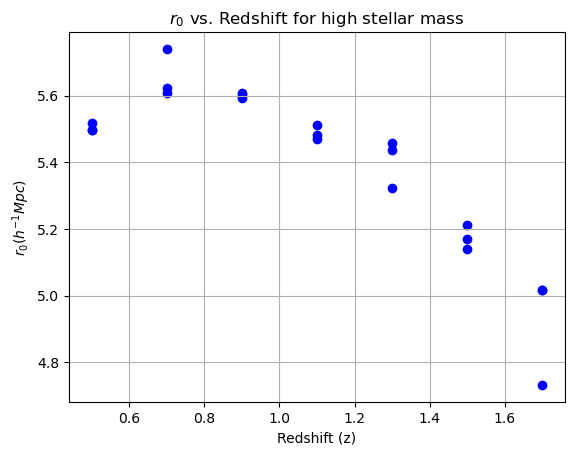

In [40]:
z_means = [subsample.info['z_mean'] for subsample in subsamples]

# Plot R_0 as a function of z_mean
plt.scatter(z_means, r0_values, marker='o', linestyle='-', color='blue')

plt.xlabel("Redshift (z)")
plt.ylabel(r"$r_0 (h^{-1} Mpc)$")
plt.title(r"$r_0$ vs. Redshift for high stellar mass")
plt.grid(True)
plt.show()

In [47]:
colors = ['blue', 'red', 'green']
m = SM_mean_range
unique_sm_means = np.unique(SM_mean_range)
print(unique_sm_means)



for i in enumerate(m):
    z_means = [subsample.info['z_mean'] for subsample in subsamples]

    # Plot R_0 as a function of z_mean
    plt.scatter(z_means, r0_values, marker='o', linestyle='-', color=colors[i])

plt.xlabel("Redshift (z)")
plt.ylabel(r"$r_0 (h^{-1} Mpc)$")
plt.title(r"$r_0$ vs. Redshift for high stellar mass")
plt.grid(True)
plt.show()

[ 8.5  9.5 10.5]


TypeError: list indices must be integers or slices, not tuple

In [42]:
m = np.unique(SM_mean_range) # Get the unique SM values

# Define two distinct colors for the two SM ranges
colors = ['blue', 'red']  # You can customize these colors

# Separate data by the first two SM ranges (assuming two unique values)

data_by_sm = [{'z_mean': [], 'r0': []} for _ in m]  # Empty dictionaries for each SM range

for i, SM_mean in enumerate(SM_mean_range):
    if SM_mean in m:
        index = np.where(m == SM_mean_range)[0][0]  # Find index in unique_sm_means
        data_by_sm[index]['z_mean'].append(z_means[i])
        data_by_sm[index]['r0'].append(r0_values[i])

# Plot data for each SM range with different colors
for i, SM_mean in enumerate(SM_mean_range):
    z_mean_subset = data_by_sm[i]['z_mean']
    r0_subset = data_by_sm[i]['r0']
    label = f"SM_mean: {sm_range:.2f}"
    plt.scatter(z_mean_subset, r0_subset, label=label, marker='o', color=colors[i])

plt.xlabel("Redshift (z)")
plt.ylabel(r"$r_0 (h^{-1} Mpc)$")
plt.title(r"$r_0$ vs. Redshift (Different Stellar Mass Ranges)")
#plt.savefig("r0_vs_redshift_for_high_SM.png")

plt.grid(True)
plt.legend()
plt.show()

ValueError: operands could not be broadcast together with shapes (3,) (21,) 

 Higher Mass Galaxies: Typically, higher mass galaxies tend to have stronger clustering than lower mass galaxies. This means they are more likely to be found in groups and clusters.

Evolution with Redshift: Clustering of galaxies often increases with redshift, meaning galaxies were more clustered in the past compared to today.

## Halomod

* **Dark Matter Correlation Function:** This function describes how the density of dark matter is correlated at different spatial separations. It's a key ingredient in understanding the distribution of matter in the universe.
* **Galaxy Bias:** Galaxies are not perfectly tracers of the underlying dark matter distribution. Galaxy bias accounts for the fact that galaxies may preferentially form in regions of higher or lower dark matter density. 



1. **Calculate the Dark Matter Correlation Function:**
   - Use cosmological simulations or theoretical models (like the Halomod framework) to predict the dark matter correlation function, ξ_mm(r), as a function of separation (r).
2. **Incorporate Galaxy Bias:**
   - **Linear Bias:** For small-scale fluctuations, galaxy bias can often be approximated as a linear relationship:
      ξ_gg(r) = b^2 * ξ_mm(r) 
      where ξ_gg(r) is the galaxy-galaxy correlation function and 'b' is the galaxy bias parameter.
   - **Non-linear Bias:** On smaller scales, non-linear effects become important. These can be incorporated into the Halomod framework using more sophisticated bias models.





In [61]:

nz = hm.integrate_corr.flat_z_dist(0.4, 1.8)
gg = hm.integrate_corr.AngularCF(nz,nz,p_of_z=True,zmin=0.4,zmax=1.8,z=1.1)
gg.hod_params = {"M_min":13.27, "M_1": 14.6, "alpha":1.}
gg.theta_min = np.min(thetas[0])*np.pi/180
gg.theta_max = np.max(thetas[0])*np.pi/180
gg.theta_num = len(thetas[0])
print(gg.angular_corr_gal)

[3.71111971e-01 3.34235087e-01 2.99860065e-01 2.67966172e-01
 2.38511739e-01 2.11396971e-01 1.86514262e-01 1.63793385e-01
 1.43160938e-01 1.24484479e-01 1.07637222e-01 9.24348976e-02
 7.86950732e-02 6.60490032e-02 5.45992167e-02 4.47452612e-02
 3.65536584e-02 2.99120013e-02 2.46243059e-02 2.04688526e-02
 1.72342145e-02 1.47331098e-02 1.28120149e-02 1.13447553e-02
 1.02413494e-02 9.43399370e-03 8.82232576e-03 8.33003894e-03
 7.90759648e-03 7.52397675e-03 7.16064155e-03 6.80719042e-03
 6.45831338e-03 6.11173930e-03 5.76692935e-03 5.42428160e-03
 5.08465910e-03 4.74913463e-03 4.41888700e-03 4.09513543e-03
 3.77908691e-03 3.47192880e-03 3.17479997e-03 2.88878495e-03
 2.61488498e-03 2.35399670e-03 2.10688752e-03 1.87418806e-03
 1.65639825e-03 1.45388144e-03 1.26684181e-03 1.09532144e-03
 9.39224418e-04 7.98317844e-04 6.72224824e-04 5.60452092e-04
 4.62361078e-04 3.77144457e-04 3.03824674e-04 2.41381444e-04
 1.88996670e-04 1.46179008e-04 1.13216373e-04 8.96391239e-05]


/home/astro/manasoi7/.conda/envs/project/lib/python3.12/site-packages/halomod/halo_model.py:784: UserWarning: You are using an un-normalized mass function and bias function pair.Bias Tinker10 has the following paired HMF model: (). Matter correlations are not well-defined.
  tools.norm_warn(self)


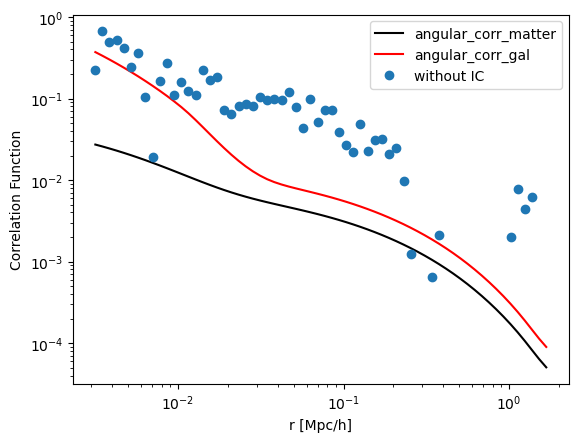

In [62]:
plt.errorbar(thetas[0], ws[0], fmt='o', label='without IC')

plt.plot(gg.theta*180/np.pi, gg.angular_corr_matter,'k-', label='angular_corr_matter') #clustering of density of dark matter projected using z distribution
plt.plot(gg.theta*180/np.pi, gg.angular_corr_gal, 'r-', label='angular_corr_gal')


plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("r [Mpc/h]")
plt.ylabel("Correlation Function")
plt.show()

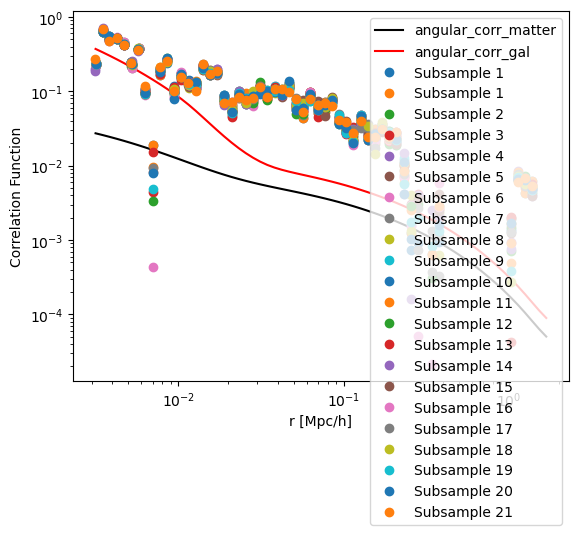

In [119]:
for i, subsample in enumerate(subsamples):
    
    #plt.errorbar(thetas[i],ws[i], fmt='o', label=f"Subsample {i+1}")#'without IC
    plt.errorbar(subsample.info['theta'], subsample.info['w'],  fmt='o',label=f"Subsample {i+1}")
    

plt.plot(gg.theta*180/np.pi, gg.angular_corr_matter,'k-', label='angular_corr_matter') #clustering of density of dark matter projected using z distribution
plt.plot(gg.theta*180/np.pi, gg.angular_corr_gal, 'r-', label='angular_corr_gal')


plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("r [Mpc/h]")
plt.ylabel("Correlation Function")
plt.show()

In [64]:
"""
# Convert ws to a NumPy array
ws_np = np.array(ws)
ws_reshaped = ws_np.flatten()

print(len(ws_reshaped))
print(len(gg.angular_corr_matter))"""

'\n# Convert ws to a NumPy array\nws_np = np.array(ws)\nws_reshaped = ws_np.flatten()\n\nprint(len(ws_reshaped))\nprint(len(gg.angular_corr_matter))'

In [65]:
from scipy.optimize import curve_fit


# wobs(theta)= b**2 * wdm(theta)
def w_model(wdm, b):
    return wdm*(b**2)



"""
popt, pcov = curve_fit(w_model, gg.angular_corr_matter, ws_reshaped[:len(gg.angular_corr_matter)], p0=[2.0])


# Extract the best-fit bias parameter
bias = popt[0]
bias_error = np.sqrt(pcov[0, 0])


print(f" Bias: {bias:.3f} +/- {bias_error:.3f}")"""

'\npopt, pcov = curve_fit(w_model, gg.angular_corr_matter, ws_reshaped[:len(gg.angular_corr_matter)], p0=[2.0])\n\n\n# Extract the best-fit bias parameter\nbias = popt[0]\nbias_error = np.sqrt(pcov[0, 0])\n\n\nprint(f" Bias: {bias:.3f} +/- {bias_error:.3f}")'

In [66]:


"""
high_sm_biases = [] #9.5 to 11 SM

for i, subsample in enumerate(subsamples):
    # Ensure compatibility in shapes:
    
    nz = hm.integrate_corr.flat_z_dist(subsample.z_min,subsample.z_max)
    gg = hm.integrate_corr.AngularCF(nz,nz,p_of_z=True,zmin= subsample.z_min,zmax= subsample.z_max, z=subsample.info['z_mean'])
    print(subsample.z_min)
    gg.hod_params = {"M_min":13.27, "M_1": 14.6, "alpha":1.}
    gg.theta_min = np.min(subsample.info['theta'])*np.pi/180
    gg.theta_max = np.max(subsample.info['theta'])*np.pi/180
    gg.theta_num = len(thetas)
    
    popt, pcov = curve_fit(w_model, gg.angular_corr_matter, subsample.info['w'][:len(gg.angular_corr_matter)], p0=[2.0])

    # Extract the best-fit bias parameter and error
    high_sm_bias = popt[0]
    high_sm_bias_error = np.sqrt(pcov[0, 0])

     # Append bias and error to a list of tuples
    high_sm_biases.append((high_sm_bias, high_sm_bias_error))
    print(f"Bias: {high_sm_bias:.3f} +/- {high_sm_bias_error:.3f}")
# Create a NumPy array from the list of tuples
high_biases_array = np.array(high_sm_biases)

# Save the array to a text file
np.savetxt('high_sm_biases.txt', high_biases_array, delimiter=',')"""




####uncomment here!!!! 
"""
# Load the data from the text file
hb = np.loadtxt('high_sm_biases.txt', delimiter=',')

# Extract bias and error values from the loaded data
H_biases = hb[:, 0]
H_errors = hb[:, 1]"""

"\n# Load the data from the text file\nhb = np.loadtxt('high_sm_biases.txt', delimiter=',')\n\n# Extract bias and error values from the loaded data\nH_biases = hb[:, 0]\nH_errors = hb[:, 1]"

In [67]:
"""low_sm_biases = [] #8 to 9.5 SM

for i in ws:
    # Ensure compatibility in shapes:
    ws_np = np.array(i)
    ws_reshaped = ws_np.flatten()

    popt, pcov = curve_fit(w_model, gg.angular_corr_matter, ws_reshaped[:len(gg.angular_corr_matter)], p0=[2.0])

    # Extract the best-fit bias parameter and error
    low_sm_bias = popt[0]
    low_sm_bias_error = np.sqrt(pcov[0, 0])

    # Append bias and error to a list of tuples
    low_sm_biases.append((low_sm_bias, low_sm_bias_error))

# Create a NumPy array from the list of tuples
low_biases_array = np.array(low_sm_biases)

# Save the array to a text file
np.savetxt('low_sm_biases.txt', low_biases_array, delimiter=',')"""






####uncomment here!!!! 

"""
# Load the data from the text file
lb = np.loadtxt('low_sm_biases.txt', delimiter=',')

# Extract bias and error values from the loaded data
L_biases = lb[:, 0]
L_errors = lb[:, 1]"""

"\n# Load the data from the text file\nlb = np.loadtxt('low_sm_biases.txt', delimiter=',')\n\n# Extract bias and error values from the loaded data\nL_biases = lb[:, 0]\nL_errors = lb[:, 1]"

In [68]:
diff_sm_biases = [] #8 to 11 SM

for i in ws:
    # Ensure compatibility in shapes:
    ws_np = np.array(i)
    ws_reshaped = ws_np.flatten()

    popt, pcov = curve_fit(w_model, gg.angular_corr_matter, ws_reshaped[:len(gg.angular_corr_matter)], p0=[2.0])

    # Extract the best-fit bias parameter and error
    diff_sm_bias = popt[0]
    diff_sm_bias_error = np.sqrt(pcov[0, 0])

     # Append bias and error to a list of tuples
    diff_sm_biases.append((diff_sm_bias, diff_sm_bias_error))
    print(f"Bias: {diff_sm_bias:.3f} +/- {diff_sm_bias_error:.3f}")

# Create a NumPy array from the list of tuples
diff_sm_bias_array = np.array(diff_sm_biases)

# Save the array to a text file
np.savetxt('diff_sm_biases.txt', diff_sm_bias_array, delimiter=',')

    
# Load the data from the text file
diff = np.loadtxt('diff_sm_biases.txt', delimiter=',')

# Extract bias and error values from the loaded data
diff_biases = diff[:, 0]
diff_errors = diff[:, 1]

Bias: 3.971 +/- 0.112
Bias: 3.974 +/- 0.114
Bias: 3.976 +/- 0.111
Bias: 3.971 +/- 0.120
Bias: 3.973 +/- 0.113
Bias: 3.974 +/- 0.115
Bias: 3.976 +/- 0.113
Bias: 3.975 +/- 0.111
Bias: 3.972 +/- 0.111
Bias: 3.972 +/- 0.112
Bias: 3.974 +/- 0.111
Bias: 3.973 +/- 0.112
Bias: 3.974 +/- 0.111
Bias: 3.972 +/- 0.120
Bias: 3.971 +/- 0.110
Bias: 3.978 +/- 0.115
Bias: 3.976 +/- 0.110
Bias: 3.974 +/- 0.112
Bias: 3.975 +/- 0.112
Bias: 3.973 +/- 0.112
Bias: 3.997 +/- 0.110


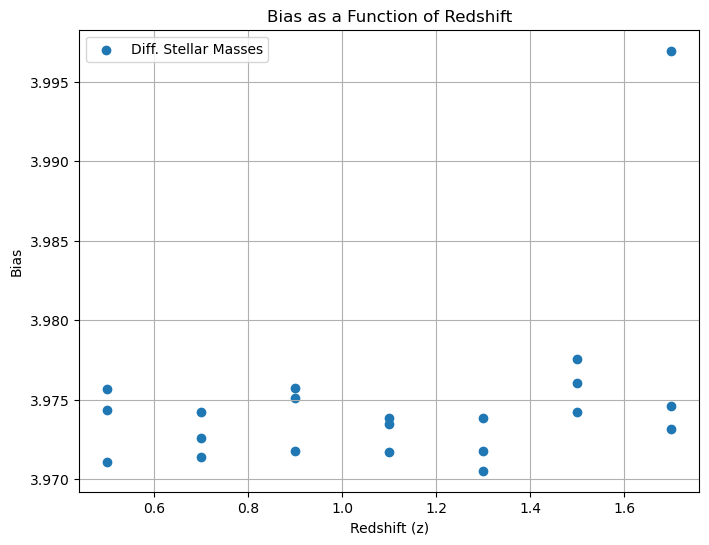

In [99]:
plt.figure(figsize=(8, 6))  # Adjust figure size as needed

# Extract bias and redshift values
redshifts = [subsample.info['z_mean'] for subsample in subsamples]

# Plot bias vs. redshift

#plt.errorbar(redshifts, L_biases, label='Low Stellar Mass ',marker='o') # 8 to 9.5
#plt.errorbar(redshifts, H_biases, label='High Stellar Mass',marker='o') #9.5 to 11
plt.scatter(redshifts, diff_biases, label='Diff. Stellar Masses',marker='o')

plt.xlabel("Redshift (z)")
plt.ylabel("Bias")
plt.title("Bias as a Function of Redshift")

#plt.savefig("Bias as a Function of Redshift")

# Customize plot (optional)
plt.grid(True)
plt.legend()
plt.show()


### Interpreting the Bias:

* b > 1: Galaxies cluster more strongly than dark matter. This could be due to various physical processes like baryonic feedback or halo assembly bias.
* b < 1: Galaxies cluster less strongly than dark matter. This might be due to observational biases or specific galaxy populations.


The bias is naturally larger at earlier epochs of galaxy formation, as the first galaxies to form will collapse in the most overdense regions of space, which are biased (akin to mountain peaks being clustered). They further show that regardless of the initial amplitude of the bias factor, with time galaxies will become unbiased tracers of the mass distribution (b tends 1 as t tends to infinity).

In [120]:
#for i, catalog in enumerate(catalogs):
for i, subsample in enumerate(subsamples):
   
   # plt.errorbar(thetas[i],ws[i], fmt='o', label=f"Subsample {i+1}")#without IC
    plt.errorbar(subsample.info['theta'], subsample.info['w'],  fmt='o',label=f"Subsample {i+1}")

    plt.plot(gg.theta*180/np.pi, gg.angular_corr_matter* H_biases[i],  label=f"bias {i+1}")


#plt.plot(gg.theta*180/np.pi, gg.angular_corr_matter,'k-', label='angular_corr_matter') #clustering of density of dark matter projected using z distribution
#plt.plot(gg.theta*180/np.pi, gg.angular_corr_gal, 'r-', label='angular_corr_gal')
for i, subsample in enumerate(subsamples):
    N = len(catalog)
    
    print(f"Subsample {i+1}: N = {N}")
    print(f"  z_mean: {subsample.info['z_mean']}")
    print(f"  SM_mean: {subsample.info['SM_mean']}")
    print(f"  z_min: {subsample.info['z_min']}")
    print()

plt.title("CFs with biases fit")

plt.savefig("CFs with biases fit")
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.xlabel("r [Mpc/h]")
plt.ylabel("Correlation Function")
plt.show()

NameError: name 'H_biases' is not defined

In [ ]:


# Create a new figure for the bias vs. redshift plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed

# Plot bias vs. redshift
redshifts = [subsample.info['z_mean'] for subsample in subsamples]  # Assuming z_mean is in subsample.info dictionary
plt.scatter(redshifts, H_biases, label='High SM',marker='o')  # Use colors list for consistent coloring
# Add labels and title
plt.xlabel("Redshift (z)")
plt.ylabel("Bias")
plt.title("Bias as a Function of Redshift")


# Customize plot (optional)
plt.grid(True)
plt.legend()
plt.show()

## $r_0$ vs. Redshift (Different Stellar Mass Ranges

In [49]:
print(r0_values)

[5.497412079281236, 5.496248887402452, 5.518002874107038, 5.740378687879652, 5.624296482125368, 5.6069607312823795, 5.60132149428613, 5.594161443465939, 5.609332176810456, 5.469740759951957, 5.512904329281942, 5.4833104948089915, 5.322033978087049, 5.457516585044595, 5.436520506346023, 5.168875942899431, 5.140468955906782, 5.212316248946296, 5.017795614478362, 5.015968330907347, 4.731752613946579]


In [102]:
#m = SM_mean_range
m = np.unique(SM_mean_range) # Get the unique SM values

z= z_mean_range
print('len(m):',len(m))
print('len(z):',len(z))

zm=np.meshgrid(m,z)
np.array(zm)


len(m): 3
len(z): 7


array([[[ 8.5,  9.5, 10.5],
        [ 8.5,  9.5, 10.5],
        [ 8.5,  9.5, 10.5],
        [ 8.5,  9.5, 10.5],
        [ 8.5,  9.5, 10.5],
        [ 8.5,  9.5, 10.5],
        [ 8.5,  9.5, 10.5]],

       [[ 0.5,  0.5,  0.5],
        [ 0.7,  0.7,  0.7],
        [ 0.9,  0.9,  0.9],
        [ 1.1,  1.1,  1.1],
        [ 1.3,  1.3,  1.3],
        [ 1.5,  1.5,  1.5],
        [ 1.7,  1.7,  1.7]]])

In [103]:
zm=np.array(zm).reshape(2,-1)
zm[:,0]

array([8.5, 0.5])

In [104]:
#r0s_reshaped = np.reshape(r0_values, (len(m), len(z)))  # since r0s is a flattened array
r0s_reshaped = np.reshape(r0_values, (len(z), len(m))).T  # since r0s is a flattened array

#print(r0s_reshaped)

In [105]:
print(len(r0_values))

21


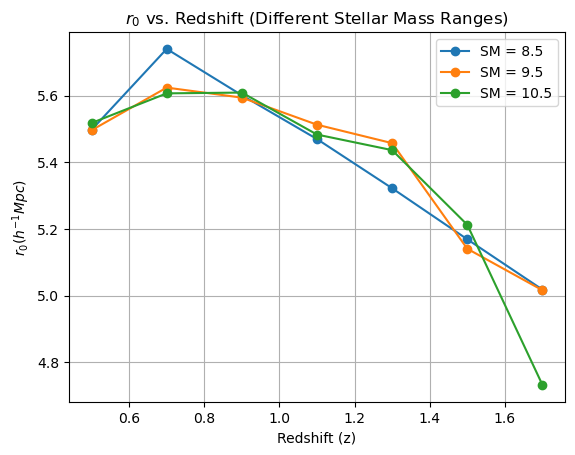

In [106]:
for i in range(len(m)):
    plt.plot(z, r0s_reshaped[i], label=f"SM = {m[i]:.1f}",marker='o')

plt.xlabel("Redshift (z)")
plt.ylabel(r"$r_0 (h^{-1} Mpc)$")
plt.title(r"$r_0$ vs. Redshift (Different Stellar Mass Ranges)")
plt.grid(True)
plt.legend()
plt.savefig("r0_vs_redshift_for_diff_SM.png")  
plt.show()

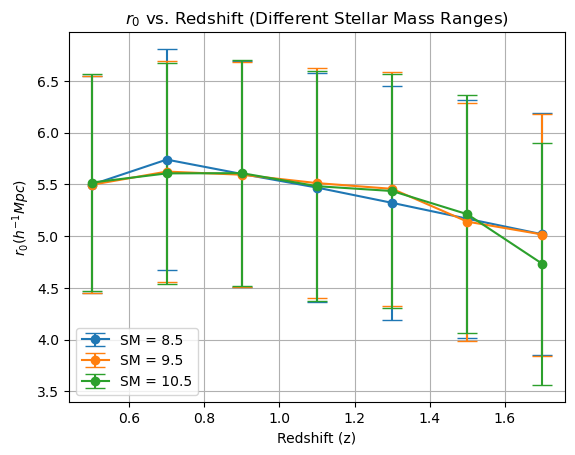

In [107]:
for i in range(len(m)):
    sigma = [0.1 * z_mean + 1 for z_mean in z]  # is the rms error on each redshift
    plt.errorbar(z, r0s_reshaped[i], yerr=sigma, label=f"SM = {m[i]:.1f}",marker='o',capsize=7,)

plt.xlabel("Redshift (z)")
plt.ylabel(r"$r_0 (h^{-1} Mpc)$")
plt.title(r"$r_0$ vs. Redshift (Different Stellar Mass Ranges)")
plt.grid(True)
plt.legend()
plt.savefig("r0_vs_redshift_for_diff_SM_sigma.png")  
plt.show()

In [108]:
diff_biases[20]

3.996955831185712

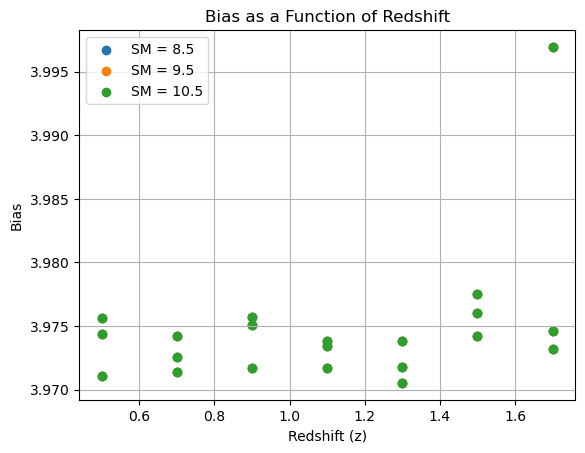

In [109]:
for i in range(len(m)):
    plt.scatter(redshifts, diff_biases,  label=f"SM = {m[i]:.1f}",marker='o')
    

    

plt.xlabel("Redshift (z)")
plt.ylabel("Bias")
plt.title("Bias as a Function of Redshift")

#plt.savefig("Bias as a Function of Redshift")

# Customize plot (optional)
plt.grid(True)
plt.legend()
plt.show()

In [114]:

# Define the directory where you want to save the file
directory_SN_C3 = "/home/astro/manasoi7/Master_Thesis/Results/SN-C3" 

# Create the directory if it doesn't exist
os.makedirs(directory_SN_C3, exist_ok=True) 

In [115]:
import csv  # Import the csv module for convenient text file writing

results = []

for i, subsample in enumerate(subsamples):
    # Create a list/tuple to hold data for the current subsample
    subsample_data = [subsample.info['SM_mean'], subsample.info['z_mean'], diff_biases[i], r0_values[i]]

    # Append the subsample data to the results list
    results.append(subsample_data)

# Save the results to a text file with appropriate headers
with open('/home/astro/manasoi7/Master_Thesis/Results/SN-C3/subsamples_info_SN-C3.txt', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['SM_mean', 'z_mean', 'diff_biases', 'r0_values'])  # Write headers
    writer.writerows(results)  # Write each subsample data as a row


In [116]:

# Create a NumPy array from the list of lists (modified for 3 columns)
#results_array = np.array(results)

# Construct the full file path
c = os.path.join(directory_SN_C3, "subsamples_info_SN-C3.txt")

# Save the array using delimiter for each column (modified for 3 columns)
np.savetxt(c, results, delimiter=',', fmt='%.3f')


# Load the data from the text file
C3 = np.loadtxt(c, delimiter=',')

In [117]:
print(C3)

[[ 8.5    0.5    3.971  5.497]
 [ 9.5    0.5    3.974  5.496]
 [10.5    0.5    3.976  5.518]
 [ 8.5    0.7    3.971  5.74 ]
 [ 9.5    0.7    3.973  5.624]
 [10.5    0.7    3.974  5.607]
 [ 8.5    0.9    3.976  5.601]
 [ 9.5    0.9    3.975  5.594]
 [10.5    0.9    3.972  5.609]
 [ 8.5    1.1    3.972  5.47 ]
 [ 9.5    1.1    3.974  5.513]
 [10.5    1.1    3.973  5.483]
 [ 8.5    1.3    3.974  5.322]
 [ 9.5    1.3    3.972  5.458]
 [10.5    1.3    3.971  5.437]
 [ 8.5    1.5    3.978  5.169]
 [ 9.5    1.5    3.976  5.14 ]
 [10.5    1.5    3.974  5.212]
 [ 8.5    1.7    3.975  5.018]
 [ 9.5    1.7    3.973  5.016]
 [10.5    1.7    3.997  4.732]]


# 4 fields

In [96]:

# Define the path to the data directory relative to the current script
data_dir = os.path.join("/home/astro/manasoi7/Master_Thesis/DATA") 

# Define file names
cat_files = ["COSMOS_masked_cat.fits", "SN-C3_masked_cat.fits",  
             "SN-X3_masked_cat.fits", "SN-E2_masked_cat.fits"]

zm_files = ["Y3_deep_fields_DB_wKNN_cat_COSMOS_zm.fits", 
            "Y3_deep_fields_DB_wKNN_cat_SN-C3_zm.fits",  
            "Y3_deep_fields_DB_wKNN_cat_SN-X3_zm.fits", 
            "Y3_deep_fields_DB_wKNN_cat_SN-E2_zm.fits"]

rand_files = ["COSMOS_randoms_ugriz_trim_video.fits", 
              "SN-C3_randoms_ugriz_trim_video.fits",  
              "SN-X3_randoms_ugriz_trim_video.fits", 
              "SN-E2_randoms_ugriz_trim_video.fits"]

names = ['COSMOS', 'SN-C3', 'SN-X3', 'SN-E2']

# Create full file paths
cat_full_paths = [os.path.join(data_dir, f) for f in cat_files]
zm_full_paths = [os.path.join(data_dir, f) for f in zm_files]
rand_full_paths = [os.path.join(data_dir, f) for f in rand_files]

In [98]:

areas = np.array([1.24, 1.7, 1.52, 1.42])
nobj = []
w = []
varw = []
rr_pairs = []

for i in range(4):
    cat = fits.open(cat_full_paths[i])[1].data
    zm = fits.open(zm_full_paths[i])[1].data
    randoms = fits.open(rand_full_paths[i])[1].data

    
    # sort and match
    cat = cat[np.argsort(cat['id'])]
    zm = zm[np.argsort(zm['id'])]
    cat = cat[np.in1d(cat['id'],zm['id'])]
    zm = zm[np.in1d(zm['id'],cat['id'])]
    cat = cat[(cat['kNN_class']==1)&(cat['bdf_mag_dered_calib_i']<25.)&
              (zm['z']>0.5)&(zm['z']<=0.7)&(zm['SM']>10.0)&(zm['SM']<=11.5)]
    
    print(names[i], len(cat), len(cat)/areas[i])
""""
    w_tmp, varw_tmp, theta, rr_ = get_w(cat, randoms)
    w.append(w_tmp)
    varw.append(varw_tmp)
    rr_pairs.append(rr_)
    nobj.append(len(cat))
    print(w_tmp)"""

nobj = np.array(nobj)

COSMOS 2642 2130.6451612903224
SN-C3 3510 2064.7058823529414
SN-X3 3290 2164.4736842105262
SN-E2 2878 2026.7605633802818
